1. Завантаження та створення DataFrame

In [73]:
import pandas as pd
from sklearn.datasets import load_iris

# Завантаження даних Iris
iris = load_iris()

# Створення DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Виведення перших рядків DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


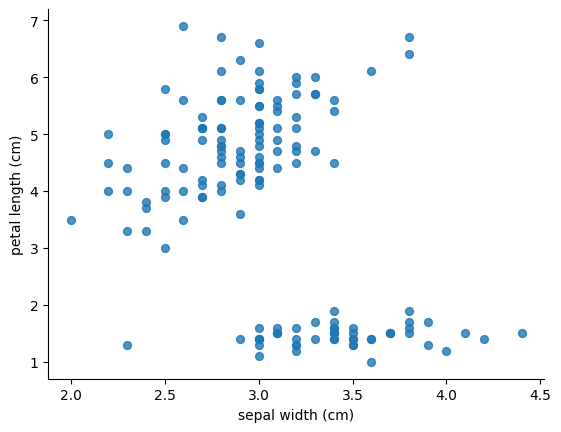

In [65]:
# @title sepal width (cm) vs petal length (cm)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal width (cm)', y='petal length (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

2. Отримання базових статистичних характеристик

In [74]:
# Отримання базових статистичних характеристик
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


3. Візуалізація розподілу спостережень за класами

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

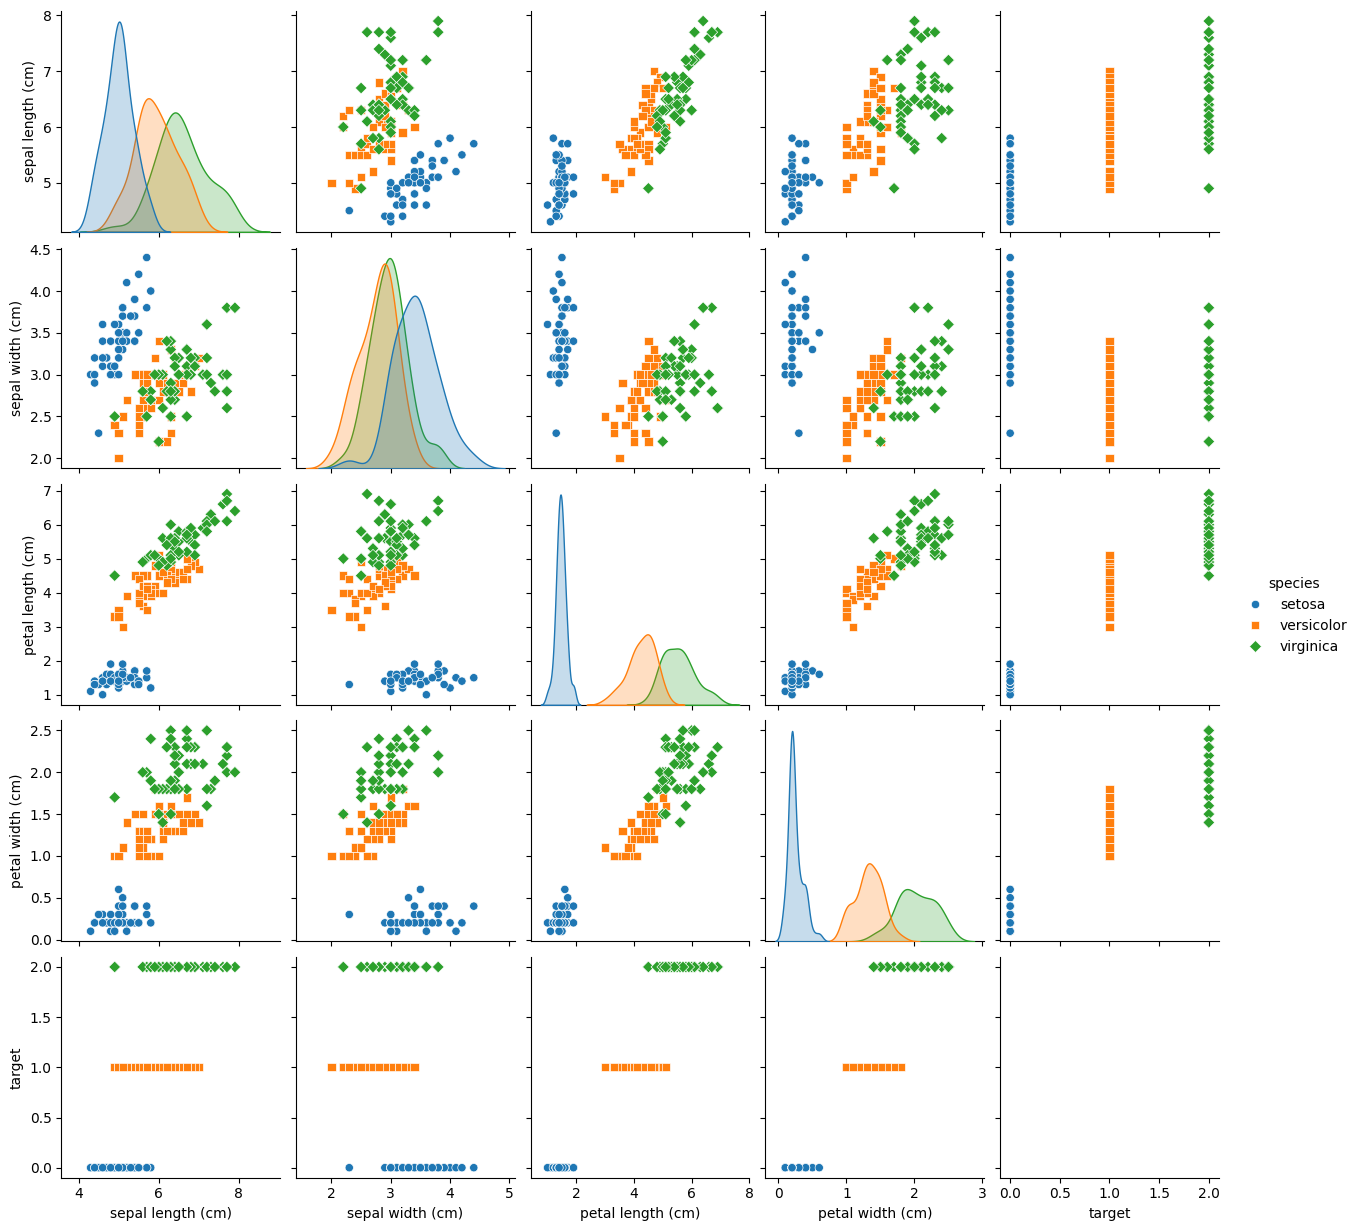

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Додавання колонок з назвами класів
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Побудова pairplot для візуалізації розподілу за класами
sns.pairplot(df, hue='species', markers=["o", "s", "D"])

# Відображення графіків
plt.show()


4. Стандартизація даних

In [76]:
from sklearn.preprocessing import StandardScaler

# Вибір ознак для стандартизації (без колонки 'target' і 'species')
features = df.drop(columns=['target', 'species'])

# Ініціалізація StandardScaler
scaler = StandardScaler()

# Стандартизація даних
scaled_features = scaler.fit_transform(features)

# Створення нового DataFrame зі стандартизованими ознаками
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['target'] = df['target']

# Виведення перших рядків стандартизованого DataFrame
df_scaled.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


5. Спектральна кластеризація

In [77]:
from sklearn.cluster import SpectralClustering

# Ініціалізація моделі спектральної кластеризації
n_clusters = 3  # У наборі даних Iris три класи
spectral_clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)

# Виконання кластеризації
df_scaled['cluster'] = spectral_clusterer.fit_predict(df_scaled.drop(columns=['target']))

# Виведення перших рядків з результатами кластеризації
df_scaled.head()





,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,0,1
1,-1.143017,-0.131979,-1.340227,-1.315444,0,1
2,-1.385353,0.328414,-1.397064,-1.315444,0,1
3,-1.506521,0.098217,-1.283389,-1.315444,0,1
4,-1.021849,1.249201,-1.340227,-1.315444,0,1


6. Порівняння спрогнозованих кластерів з дійсними класами

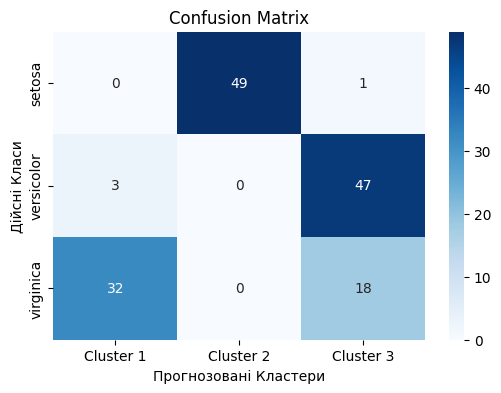

In [78]:
from sklearn.metrics import confusion_matrix

# Обчислення матриці неточностей
cm = confusion_matrix(df_scaled['target'], df_scaled['cluster'])

# Візуалізація Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'],
            yticklabels=iris.target_names)
plt.xlabel('Прогнозовані Кластери')
plt.ylabel('Дійсні Класи')
plt.title('Confusion Matrix')
plt.show()



7. Візуалізація результатів кластеризації

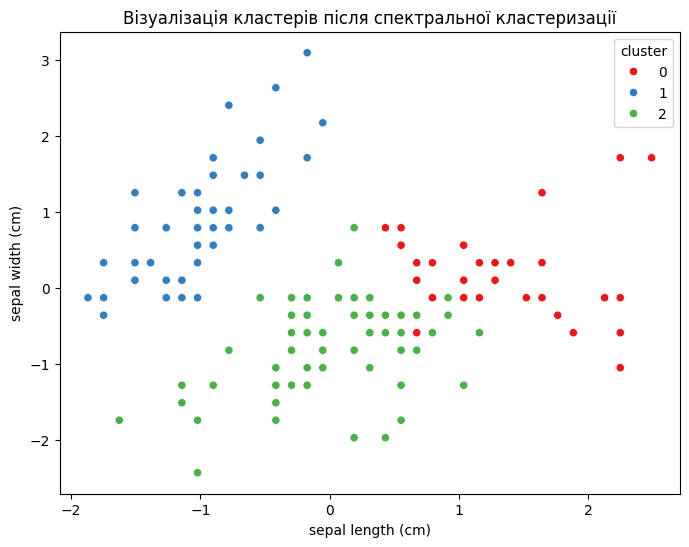

In [79]:
# Візуалізація кластерів після спектральної кластеризації
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[features.columns[0]], y=df_scaled[features.columns[1]], hue=df_scaled['cluster'], palette='Set1')
plt.title('Візуалізація кластерів після спектральної кластеризації')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.show()




код з додаванням KMeans

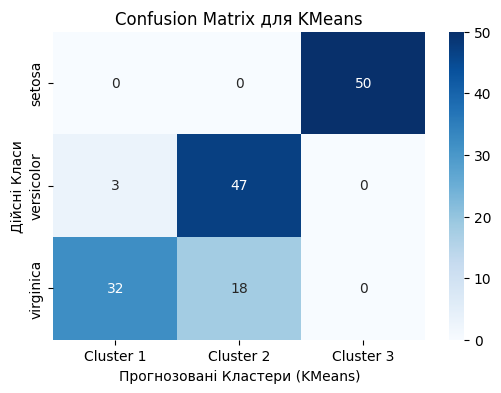

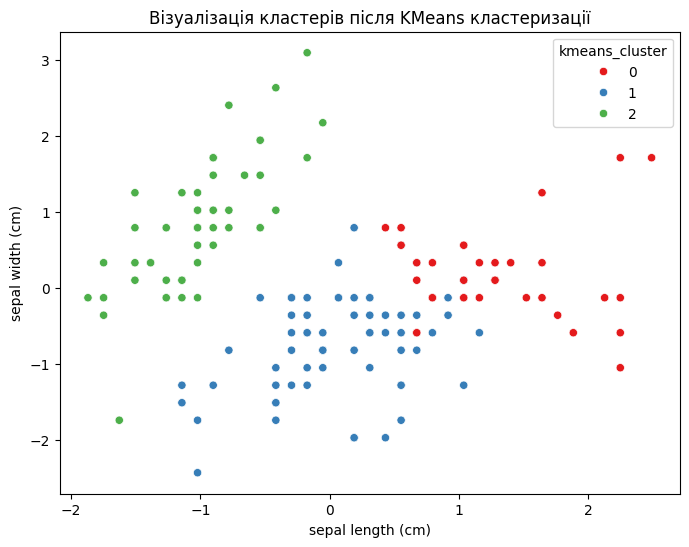

In [81]:
from sklearn.cluster import KMeans

# Ініціалізація моделі KMeans
kmeans_clusterer = KMeans(n_clusters=3, random_state=42)

# Виконання кластеризації KMeans
df_scaled['kmeans_cluster'] = kmeans_clusterer.fit_predict(df_scaled.drop(columns=['target']))

# Порівняння спрогнозованих кластерів від KMeans та дійсних класів
from sklearn.metrics import confusion_matrix

# Обчислення матриці неточностей для KMeans
cm_kmeans = confusion_matrix(df_scaled['target'], df_scaled['kmeans_cluster'])

# Візуалізація Confusion Matrix для KMeans
plt.figure(figsize=(6, 4))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'],
            yticklabels=iris.target_names)
plt.xlabel('Прогнозовані Кластери (KMeans)')
plt.ylabel('Дійсні Класи')
plt.title('Confusion Matrix для KMeans')
plt.show()

# Візуалізація кластерів після KMeans кластеризації
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[features.columns[0]], y=df_scaled[features.columns[1]], hue=df_scaled['kmeans_cluster'], palette='Set1')
plt.title('Візуалізація кластерів після KMeans кластеризації')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.show()


8. Висновок

Метою цього завдання було провести кластеризацію на наборі даних Iris та порівняти результати двох методів — спектральної кластеризації та KMeans. У процесі роботи ми використали наступні підходи:

1. Завантаження та попередня обробка даних: Ми завантажили дані Iris і стандартизували їх за допомогою StandardScaler для підготовки до кластеризації.

2. Спектральна кластеризація:

- Ми застосували спектральну кластеризацію з різними параметрами та проаналізували результати за допомогою Confusion Matrix.
Кластеризація показала, що клас setosa був майже ідеально відокремлений, тоді як класи versicolor і virginica мали деякі перехресні кластеризації.
3. KMeans кластеризація:

- Ми порівняли результати спектральної кластеризації з методом KMeans. Результати KMeans виявились дуже схожими: клас setosa також кластеризувався ідеально, а класи versicolor і virginica мали перехресну кластеризацію.
4. Оцінка результатів:

- Обидва методи продемонстрували високу точність для класифікації класів з чіткими відмінностями (особливо setosa), але зіткнулись з труднощами під час кластеризації класів versicolor і virginica, які мають схожі характеристики.

Основні результати показують, що обидва методи — спектральна кластеризація та KMeans — добре підходять для вирішення завдань кластеризації на наборі даних Iris, але кожен з них має певні обмеження при класифікації класів з подібними ознаками.